## **Technology and Communication**

### 第7回授業「コミュニケーションとセキュリティ」参考資料

<br />

--- 

<br />

一方向関数を利用して外部に知られずに「鍵」として使うべき数字（`n`）を2者間で決定したい

ひとたび鍵（`n`）を決定すれば、暗号文のやりとりなど様々な用途に活用することができる


**登場人物**

- Alice（Bobと共通の鍵（`n`）を決めたい）
- Bob（Aliceと共通の鍵（`n`）を決めたい）
- Eve（AliceとBobの鍵（`n`）を盗みたい）

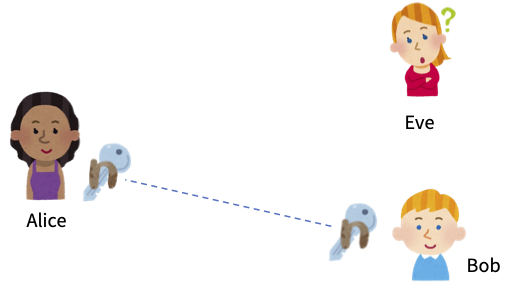


---

オレンジ色のボックスの内容は外部に漏れてもOK

AliceとBobだけでなくEveにも筒抜けだが問題ない。

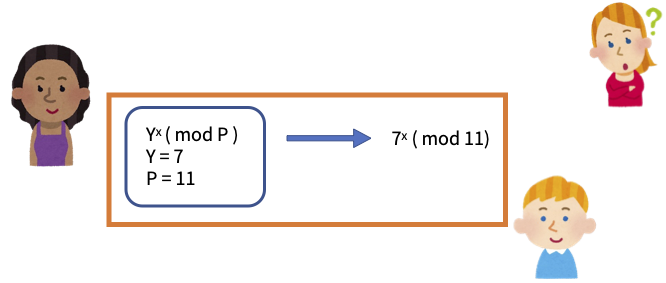





In [4]:
# 一方向関数を作成する関数（高階関数を利用）

def create_one_way_function(y, p):
    def one_way_function(x):
        return (y ** x) % p

    # もしyがpよりも小さければ必要な一方向関数を返す
    if y < p:
        return one_way_function
    # そうでなければエラーを返す
    else:
        raise ValueError

In [5]:
# エラーチェック

# この組み合わせではエラーが出る
y_test = 7
p_test = 5 

try:
    create_one_way_function(y_test, p_test)
    print("No problem!")
except ValueError:
    print("Error: y must be smaller than p!")


Error: y must be smaller than p!


In [6]:
# アリスとボブの取り決め（エラーは出ない）
y = 7
p = 11

try:
    create_one_way_function(y, p)
    print("No problem!")
except ValueError:
    print("Error: y must be smaller than p!")

No problem!


In [7]:
# アリスとボブが使う一方向関数

f = create_one_way_function(y, p)

---

バルーン💭の中の内容はAliceだけ、もしくはBobだけが知っている

「頭の中」の数は誰にも知らせない！

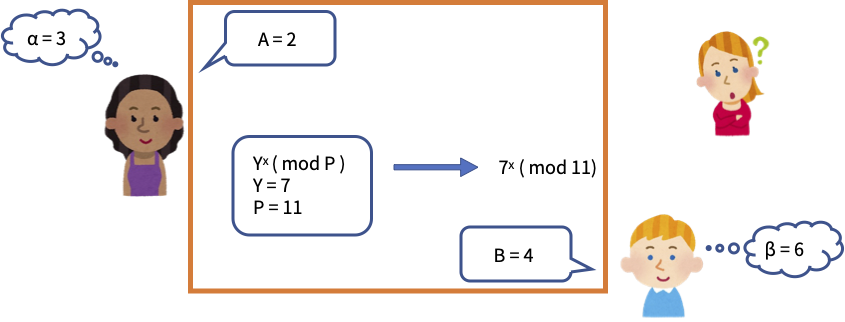


In [8]:
# アリスの頭の中（アリス以外にはわからない）

alpha = 3

In [9]:
# ボブの頭の中（ボブ以外にはわからない）

beta = 6

互いに「伝える数」は外部に知られてもOK

AliceとBobだけでなくEveにも筒抜けだが構わない


In [10]:
# アリスがボブに伝える数
a = f(alpha)
print(f'Alice → Bob: {a}')

Alice → Bob: 2


In [11]:
# ボブがアリスに伝える数
b = f(beta)
print(f'Bob → Alice: {b}')

Bob → Alice: 4


---

「頭の中の数」に基づいて鍵（`n`）を決定する。

Aliceの計算結果とBobの計算結果は一致するので鍵として使用できる

Eveは鍵を知ることができない。

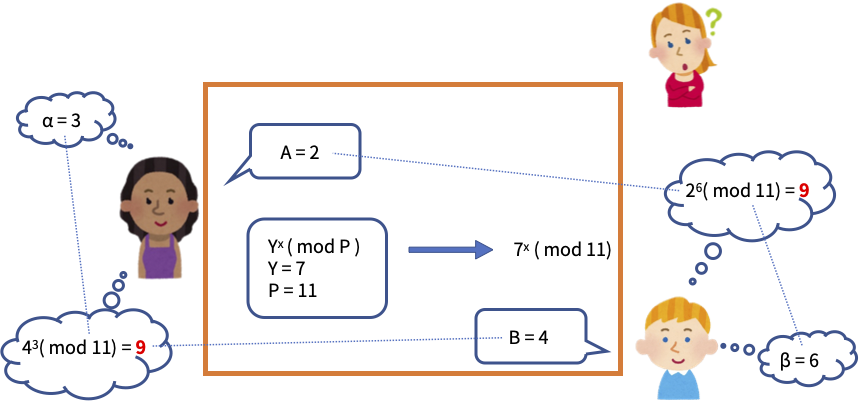

In [12]:
# アリス側での鍵決定作業

key_for_alice = (b ** alpha) % 11
print(key_for_alice)

9


In [13]:
# ボブ側での鍵決定作業

key_for_bob = (a ** beta) % 11
print(key_for_bob)

9


--- 

共通の鍵の確認

In [14]:
# 共通の鍵となっていれば true

print(key_for_alice == key_for_bob)

True


**めでたし、めでたし** 😊